<a href="https://colab.research.google.com/github/SH22Hwang/GNU_AugumentedIntelligenceLab/blob/main/eunsun/chap06lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

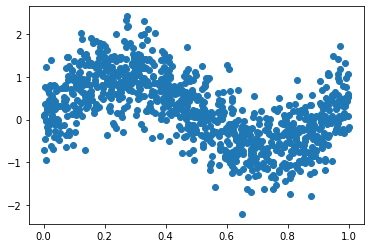

In [ ]:
# LAB 6-1
# 1.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')

plt.scatter(df['x'],df['y'])

In [ ]:
# 2.
from sklearn.preprocessing import PolynomialFeatures

X = df['x'].to_numpy()
y = df['y'].to_numpy()
X = X.reshape(-1, 1)  # 하나씩 재배열
feature_cubic = PolynomialFeatures(degree = 3)
X_3 = feature_cubic.fit_transform(X)

In [ ]:
# 3.
lin_model = LinearRegression()
domain = np.linspace(0, 1, 100).reshape(-1, 1)  # 입력은 2차원 벡터로 변형

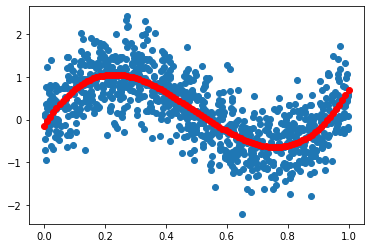

In [ ]:
# 4.
lin_model.fit(X_3, y)
domain_3 = feature_cubic.fit_transform(domain)
predictions = lin_model.predict(domain_3)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, predictions, color='r')

In [ ]:
# LAB 6-2
# 1.
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X, y = iris.data[:, :2], iris.target
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# 2.
from sklearn.tree import export_graphviz

export_graphviz(
    dec_tree,
    out_file=('./dec_tree_for_iris.dot'),
    feature_names=iris.feature_names[:2],
)

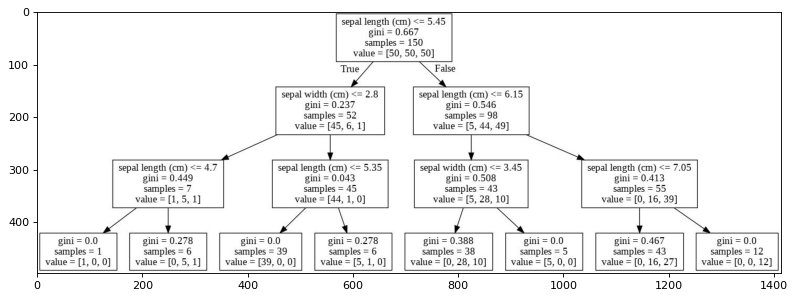

In [ ]:
# 3.
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

import matplotlib.pyplot as plt

dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

In [35]:
# LAB 6-3
# 1.
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X, y = iris.data, iris.target
dec_tree = DecisionTreeClassifier(max_depth=3, criterion= 'entropy')
dec_tree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
# 2.
from sklearn.tree import export_graphviz

export_graphviz(
    dec_tree,
    out_file = ("./dec_tree_for_iris.dot"),
    feature_names = iris.feature_names
)

Error: dot: option -  unrecognized

Usage: dot [-Vv?] [-(GNE)name=val] [-(KTlso)<val>] <dot files>
(additional options for neato)    [-x] [-n<v>]
(additional options for fdp)      [-L(gO)] [-L(nUCT)<val>]
(additional options for memtest)  [-m<v>]
(additional options for config)  [-cv]

 -V          - Print version and exit
 -v          - Enable verbose mode 
 -Gname=val  - Set graph attribute 'name' to 'val'
 -Nname=val  - Set node attribute 'name' to 'val'
 -Ename=val  - Set edge attribute 'name' to 'val'
 -Tv         - Set output format to 'v'
 -Kv         - Set layout engine to 'v' (overrides default based on command name)
 -lv         - Use external library 'v'
 -ofile      - Write output to 'file'
 -O          - Automatically generate an output filename based on the input filename with a .'format' appended. (Causes all -ofile options to be ignored.) 
 -P          - Internally generate a graph of the current plugins. 
 -q[l]       - Set level of message suppression (=1)
 -s[v]     

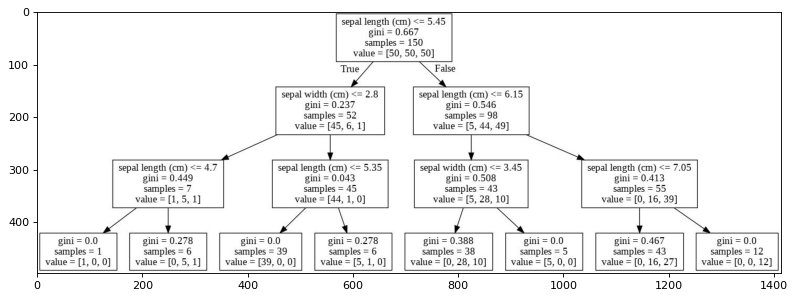

In [37]:
# 3.
!dot - Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

import matplotlib.pyplot as plt

dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize = (12,8), dpi=80,
           facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)